### 1. Import bibliotek

In [13]:
import os
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

### 2. Wyswietlanie listy kodow produktow o ktorych zostaly pobrane opinie

In [14]:
print(os.listdir('opinions'))

['104770639.json', '28020568.json']


### 3. Pobranie od uzytkownika kodu produktu ktorego statystyki maja byc policzone

In [15]:
product_code = input("Podaj kod produktu z Ceneo.pl")

### 4. Wczytanie z pliku JSON opini o produkcie ktorego statystyki maja byc policzone

In [22]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: float(s.split('/')[0].replace(',','.')))

### 5. Policzenie podstawowych statystyk

In [23]:
opinoins_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
pros_count = opinions.cons.astype(bool).sum()
average_start = opinions.stars.mean()
average_start

4.556818181818182

### 6. Histogram czestosci ocen produktu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

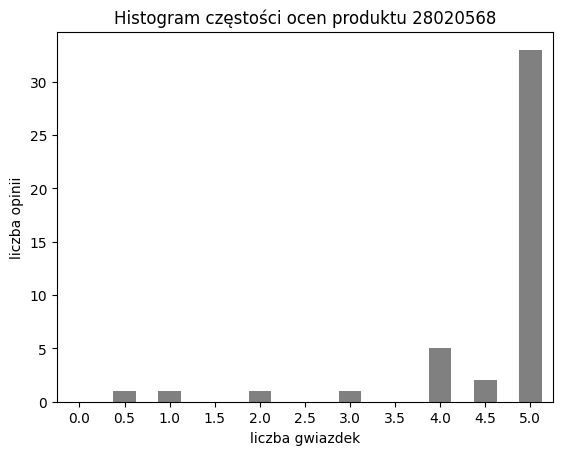

In [29]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars_distr.plot.bar(color='gray')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

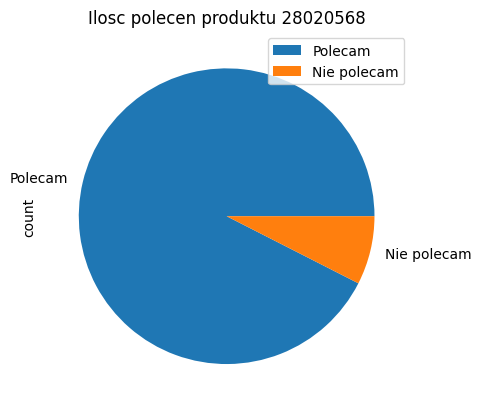

In [48]:
recomendations = opinions.recommendation.value_counts()
recomendations.plot.pie()
plt.title(f"Ilosc polecen produktu {product_code}")
plt.legend()

In [24]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,post_date,purchase_date,useful,useless
0,2907016,fred,Polecam,4.5,"Całkiem przyzwoita, zgrabna drukarka. Po 2 tyg...",[],[],2015-01-07 19:57:10,2014-12-29 11:12:25,6,0
1,18100937,w...o,Polecam,4.0,Jakość wykonania dobra. Mądry pomysł z zamykan...,[],[],2023-11-15 14:38:03,2023-10-14 16:43:53,0,0
2,2996988,Tomasz Rz,Polecam,5.0,"Polecam wszystkim tą drukarkę. Łatwość druku, ...","[chicha praca - opcjonalna, ładny wygląd, wier...",[],2015-02-13 19:43:38,2015-02-07 03:36:27,2,1
3,18178227,j...o,Polecam,4.0,"Produkt dobry . Jedyny problem to wi-fi , nie ...",[],[],2023-12-06 10:27:03,2023-11-19 10:42:11,0,0
4,13865878,d...i,Polecam,5.0,"Jest ok, za pierwszym razem uwalila lekko papi...",[],[],2021-01-29 18:52:32,2020-12-29 21:27:22,0,0
5,3183311,iwa,Polecam,5.0,"Szybki wydruk dobrej jakości, bezproblemowe in...",[],[],2015-06-09 10:13:13,2015-05-22 09:05:17,1,0
6,3657350,Użytkownik Ceneo,Polecam,5.0,Dotychczas miałam do czynienia z dużo droższym...,"[głośność pracy, jakość wydruku, szybkość wydr...",[],2016-03-24 17:05:37,None,6,4
7,18230594,m...n,Polecam,5.0,"Narazie jest wszystko w porządku, bardzo ładn...",[],[],2023-12-20 17:34:20,2023-12-16 00:00:07,0,0
8,7942211,SmartPRINT,Polecam,5.0,Dobry sprzęt za rozsądną cenę.,"[głośność pracy, jakość wydruku, ładny wygląd,...",[],2018-05-12 10:27:41,2018-04-24 15:49:33,0,0
9,4329407,Top-IT,Polecam,5.0,"możliwość druku A3+, jakość do ceny, Canon jes...",[],[],2017-01-04 11:50:44,2016-12-16 11:23:04,0,0
